# Paysim Exploratory data analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix

In [2]:
df = pd.read_csv('data.csv', nrows=300000)
df.shape

(300000, 11)

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df = df.dropna(how='any', axis=0)

In [5]:
df.shape

(300000, 11)

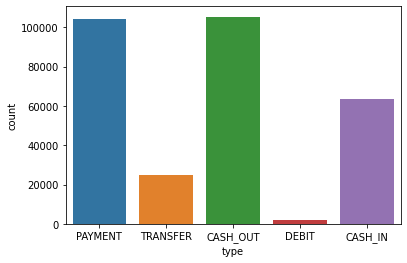

In [6]:

ax = sns.countplot(x="type", data=df)

In [7]:
#No of fradulent transaction
print(len(df[df['isFraud'] == 1]))

181


In [8]:
#which transaction type has maximum fraud

fraud_df = df[df['isFraud'] == 1]

count_by_type = fraud_df.groupby(['type'])['isFraud'].count()

count_by_type.reset_index()


,type,isFraud
0,CASH_OUT,93
1,TRANSFER,88


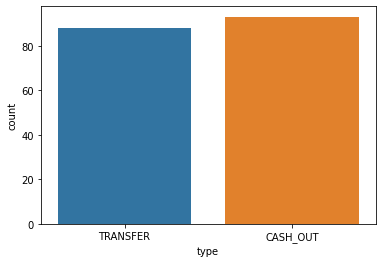

In [9]:
# most of the Fradulent transaction are of type cash_out and transferer
ax = sns.countplot(x="type", data=fraud_df)

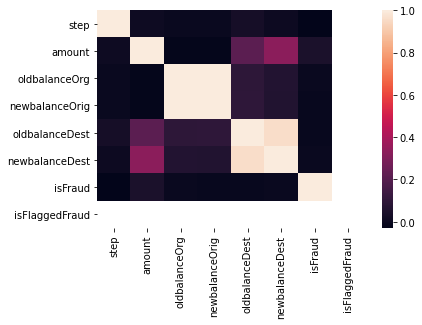

In [10]:
sns.heatmap(df.corr())

In [11]:
#correlation between isFraud and amount
df['step'].corr(df['isFraud'])



-0.028741320848721334

In [12]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,300000.000000,3.000000e+05,3.000000e+05,3.000000e+05,3.000000e+05,3.000000e+05,300000.000000,300000.0
mean,11.441470,1.761708e+05,8.855676e+05,9.042820e+05,9.774525e+05,1.196709e+06,0.000603,0.0
std,2.639757,3.016055e+05,2.849254e+06,2.886694e+06,2.369811e+06,2.594207e+06,0.024555,0.0
min,1.000000,3.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,10.000000,1.274125e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,12.000000,7.769952e+04,1.856900e+04,0.000000e+00,8.616686e+04,1.908220e+05,0.000000,0.0
75%,14.000000,2.314789e+05,1.836875e+05,2.214797e+05,8.571552e+05,1.238132e+06,0.000000,0.0
max,15.000000,1.000000e+07,3.893942e+07,3.894623e+07,4.133844e+07,4.138365e+07,1.000000,0.0


In [13]:
df.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.010046,-0.002162,-0.001530,0.030235,0.006759,-0.028741,NaN
amount,0.010046,1.000000,-0.017503,-0.020466,0.214955,0.329590,0.046144,NaN
oldbalanceOrg,-0.002162,-0.017503,1.000000,0.999054,0.095222,0.064473,-0.001311,NaN
newbalanceOrig,-0.001530,-0.020466,0.999054,1.000000,0.096783,0.063676,-0.007538,NaN
oldbalanceDest,0.030235,0.214955,0.095222,0.096783,1.000000,0.960729,-0.007508,NaN
newbalanceDest,0.006759,0.329590,0.064473,0.063676,0.960729,1.000000,-0.004159,NaN
isFraud,-0.028741,0.046144,-0.001311,-0.007538,-0.007508,-0.004159,1.000000,NaN
isFlaggedFraud,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
#encoding catagorical data
le = preprocessing.LabelEncoder()
le.fit(df['type'].unique())

df['type'] = le.transform(df['type'])


In [15]:
features = df[['type', 'amount']]

target= df['isFraud']


In [16]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.10, random_state=42)

In [17]:


clf = SVC(kernel='rbf')

In [18]:
clf.fit(X_train, y_train)

SVC()

In [19]:
print ("Predicting the people names on the testing set")
y_pred = clf.predict(X_test)

Predicting the people names on the testing set


In [20]:
test_size = len(y_test)
print( F'Testing {test_size} data')

accuracy_score(y_test, y_pred)

Testing 30000 data


0.9993666666666666

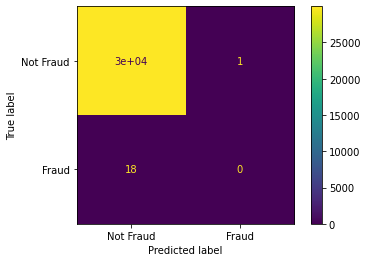

In [21]:

plot_confusion_matrix(clf,X_test, y_test, display_labels= ['Not Fraud','Fraud'])

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
clf = RandomForestClassifier()

In [24]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [25]:
y_pred = clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.9991

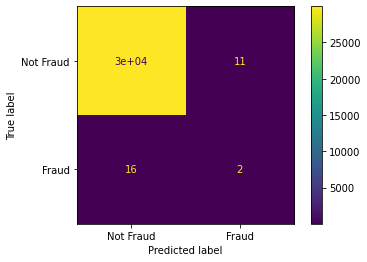

In [26]:

plot_confusion_matrix(clf,X_test, y_test, display_labels= ['Not Fraud','Fraud'])